In [6]:
!git clone https://github.com/rohit-krish/Deeplex.git
%cd Deeplex


Cloning into 'Deeplex'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 46 (delta 17), reused 41 (delta 15), pack-reused 0
Receiving objects: 100% (46/46), 87.34 KiB | 7.94 MiB/s, done.
Resolving deltas: 100% (17/17), done.
/content/Deeplex


In [7]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from tqdm import tqdm

from deeplex import nn
from deeplex.act_func import relu, sigmoid
from deeplex.engine import Tensor


In [8]:
iris = load_iris()

X = iris.data
y = iris.target

# one-hot encode
Y = np.empty((len(y), len(iris.target_names)))
for i, t in enumerate(y):
    row = np.zeros((len(iris.target_names)))
    row[t] = 1
    Y[i] = row

X = Tensor(X)
Y = Tensor(Y)

X.shape, Y.shape

((150, 4), (150, 3))

In [20]:
class Model(nn.Module):
    def __init__(self, n_in, n_out) -> None:
        self.l1 = nn.Linear(n_in, 10)
        self.l2 = nn.Linear(10, 4)
        self.l3 = nn.Linear(4, n_out)

    def __call__(self, x):
        x = relu(self.l1(x))
        x = relu(self.l2(x))
        x = sigmoid(self.l3(x))
        return x

    def parameters(self):
        return self.l1.parameters() + self.l2.parameters() + self.l3.parameters()


In [25]:
losses = []
model = Model(4, 3)

lr = .09
n_epochs = 400

loop = tqdm(range(n_epochs))

for epoch_i in loop:
    yHat = model(X)
    loss = np.sum((yHat - Y) ** 2) / len(Y)

    model.zero_grad()
    loss.backward()

    for p in model.parameters():
        p.data -= lr * p.grad

    losses.append(loss.data)
    loop.set_postfix(loss=loss.data)


100%|██████████| 200/200 [02:53<00:00,  1.16it/s, loss=0.09128392254982079]


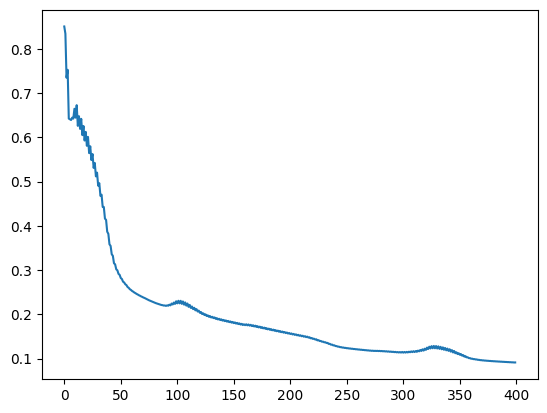

In [26]:
plt.plot(losses)
plt.show()


In [29]:
X[1], Y[1]

(Tensor([Scaler(4.9), Scaler(3.0), Scaler(1.4), Scaler(0.2)], dtype=object),
 Tensor([Scaler(1.0), Scaler(0.0), Scaler(0.0)], dtype=object))

In [32]:
model(X[1].to_numpy().reshape(1, -1)).to_numpy()

array([[0.97597864, 0.007742  , 0.00915128]])